# ADAptive LInear NEuron (ADALINE)

## Classe Adaline

In [265]:
import numpy as np
from numpy.typing import NDArray

class AdalineSGD:
    def __init__(self, eta: float, n_iter: int = 10, shuffle: bool = True, random_state: int = None):
        """
        Adaline (ADAptive LInear NEuron)

        :param eta: Learning rate
        :param n_iter: Number of epochs
        :param shuffle: If True, shuffle training data every epoch in SGD mode
        :param random_state: Seed for reproducibility
        """
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        if random_state:
            np.random.seed(random_state)

    def _init_weights(self, n: int):
        """Initialize weights to zeros."""
        self.w = np.zeros(n + 1)
    
    def _shuffle(self, X: NDArray, y: NDArray):
        """Shuffle training data."""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def fit(self, X: NDArray, y: NDArray):
        """
        Fit training data.
        Uses either batch gradient descent or stochastic gradient descent (SGD).
        
        :param X: Training examples, shape (n_samples, n_features)
        :param y: Target values, shape (n_samples,)
        """
        self._init_weights(X.shape[1])
        self.cost = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost_epoch = []
            for xi, target in zip(X, y):
                cost_epoch.append(self._update_weights(xi, target))
            self.cost.append(sum(cost_epoch) / len(y))

    def _update_weights(self, xi: NDArray, target: float):
        """Apply Adaline learning rule to update the weights in SGD mode."""
        output = self.net_input(xi)
        error = target - output
        self.w[1:] += self.eta * xi.dot(error)
        self.w[0] += self.eta * error
        return 0.5 * error ** 2  # Quadratic cost

    def net_input(self, X: NDArray):
        """Calculate net input (weighted sum)."""
        return np.dot(X, self.w[1:]) + self.w[0]

    def activation(self, X: NDArray):
        """Compute linear activation function (identity function)."""
        return self.net_input(X)

    def predict(self, X: NDArray):
        """Return class label after unit step."""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [266]:
class AdalineGD:
    def __init__(self, eta: float = 0.01, n_iter: int = 50):
        # eta: coefficiente di apprendimento (learning rate)
        # n_iter: numero massimo di iterazioni

        self.eta = eta
        self.n_iter = n_iter
    
    def _init_weights(self, n):
        self.w = np.zeros(n + 1)
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        # X: matrice degli esempio (n x d)
        # y: vettore degi target
        # la componente yi corrisponde alla riga (esempio) Xi
        self._init_weights(X.shape[1])
        self.cost = []

        for _ in range(self.n_iter):
            errors = y - self.net_input(X)
            self.w[1: ] += X.T.dot(errors) * self.eta
            self.w[0] += errors.sum() * self.eta               
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
    
    def net_input(self, X):
        # input nella rete (X * w)
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def activation(self, X: np.ndarray):
        # funzione di attivazione f, in questo caso, f(X * w) = X * w
        return self.net_input(X)
    
    def predict(self, X):
        # classifica il nuovo elemento
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [267]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """Visualizza la superficie di decisione di un classificatore su un dataset bidimensionale."""

    # Definizione dei marker e della mappa di colori
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Creazione della griglia di punti per la decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predizione delle classi sulla griglia
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Disegno della superficie di decisione
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Disegno dei punti del dataset con gestione di edgecolor
    for idx, cl in enumerate(np.unique(y)):
        marker = markers[idx]
        scatter_params = {
            "x": X[y == cl, 0],
            "y": X[y == cl, 1],
            "alpha": 0.8,
            "c": colors[idx],
            "marker": marker,
            "label": cl
        }

        # Se il marker non è 'x', aggiunge il contorno nero
        if marker != 'x':
            scatter_params["edgecolor"] = "black"

        plt.scatter(**scatter_params)


### Nota

Non funzionava perchè a quanto pare i dati dovevano essere standardizzati

In [268]:
import pandas as pd

df = pd.read_csv("Iris.csv")

y = df.iloc[0:100, 5]
y = np.where(y == "Iris-setosa", -1, 1)

X = df.iloc[0:100, [1, 3]].values

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

adaSgd = AdalineSGD(eta = 0.001, n_iter = 20)
adaSgd.fit(X_std, y)

adaGd = AdalineGD(eta = 0.001, n_iter = 20)
adaGd.fit(X_std, y)

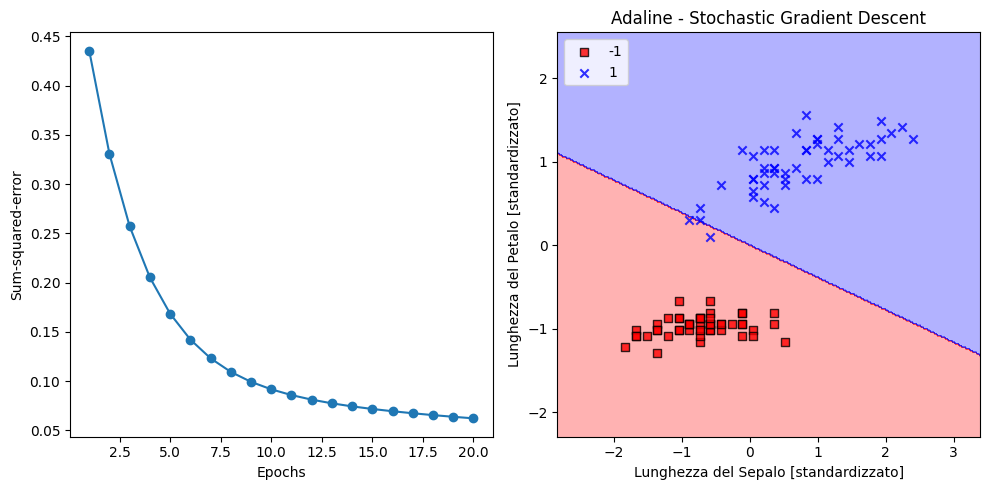

In [269]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# axs è una lista di sublot a cui ci accedo singolarmente

# primo subplot
plot_decision_regions(X=X_std, y=y, classifier=adaSgd)
axs[1].set_title("Adaline - Stochastic Gradient Descent")
axs[1].set_xlabel("Lunghezza del Sepalo [standardizzato]")
axs[1].set_ylabel("Lunghezza del Petalo [standardizzato]")

# secondo subplot
axs[0].plot(range(1, len(adaSgd.cost) + 1), adaSgd.cost, marker='o')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Sum-squared-error')

plt.legend(loc="upper left")
plt.tight_layout()


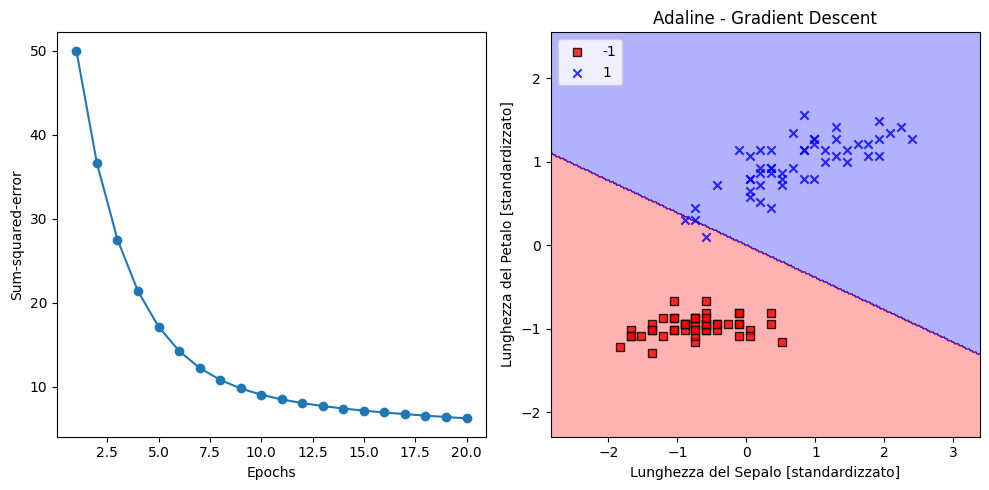

In [270]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_decision_regions(X=X_std, y=y, classifier=adaGd)
axs[1].set_title("Adaline - Gradient Descent")
axs[1].set_xlabel("Lunghezza del Sepalo [standardizzato]")
axs[1].set_ylabel("Lunghezza del Petalo [standardizzato]")

axs[0].plot(range(1, len(adaGd.cost) + 1), adaGd.cost, marker='o')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Sum-squared-error')

plt.legend(loc="upper left")
plt.tight_layout()
